# CO2 Emission Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
# Load the dataset
df = pd.read_csv('co2_emissions (1).csv')

# Step 1: Data Preprocessing

#### a) Handling Missing Data

In [3]:

# Check for null values
missing_data = df.isnull().sum()

#### b) Handling Duplicates

In [4]:

# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

#### c) Data Type Conversion

In [5]:

# One-Hot Encoding for 'transmission' and 'fuel_type'
df_encoded = pd.get_dummies(df_cleaned, columns=['transmission', 'fuel_type'], drop_first=True)

#### d) Feature Selection

In [6]:

# Dropping redundant features like 'model'
df_final = df_encoded.drop(['model'], axis=1)

#### Display the cleaned dataset info and first few rows

In [7]:
print("Missing Data:\n", missing_data)
print("Duplicate Rows Removed:", duplicate_rows.shape[0])
print("Cleaned Dataset Info:\n")
df_final.info()
print("\nFirst 5 Rows of Cleaned Data:\n", df_final.head())

Missing Data:
 make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64
Duplicate Rows Removed: 1112
Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   vehicle_class                   6273 non-null   object 
 2   engine_size                     6273 non-null   float64
 3   cylinders                       6273 non-null   int64  
 4   fuel_consu

In [ ]:
df_final.to_csv('cleaned_data.csv', index=True)

# Step 2: Exploratory Data Analysis (EDA)

#### a) Visualizing the Data

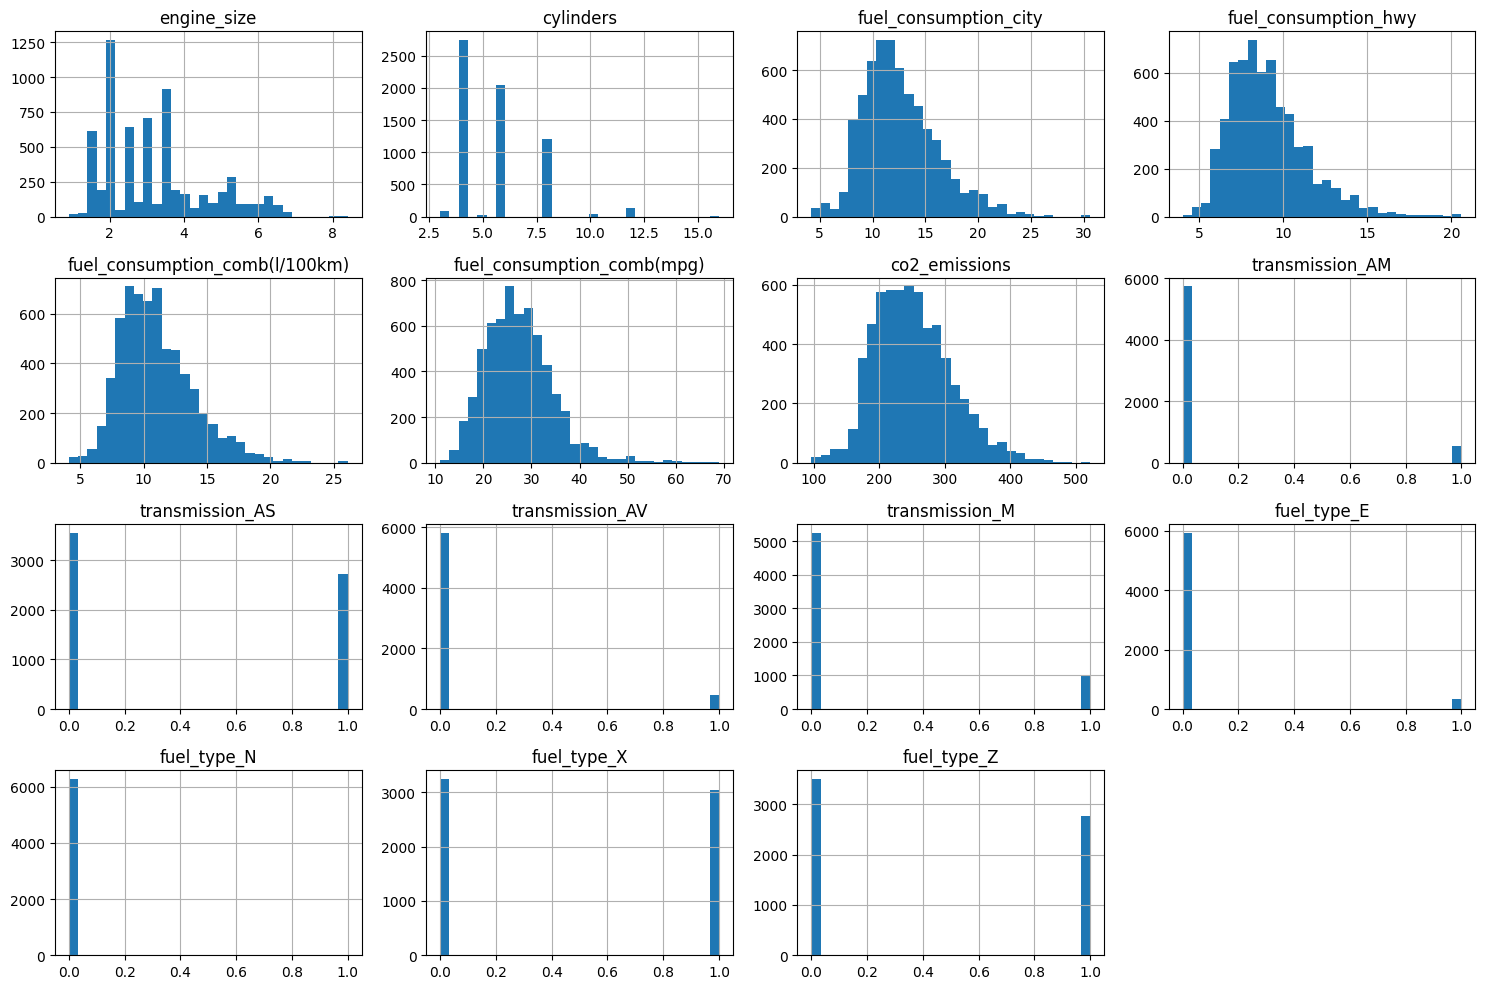

In [8]:

# Histograms for numerical features
df_final.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


#### Box plots to identify outliers

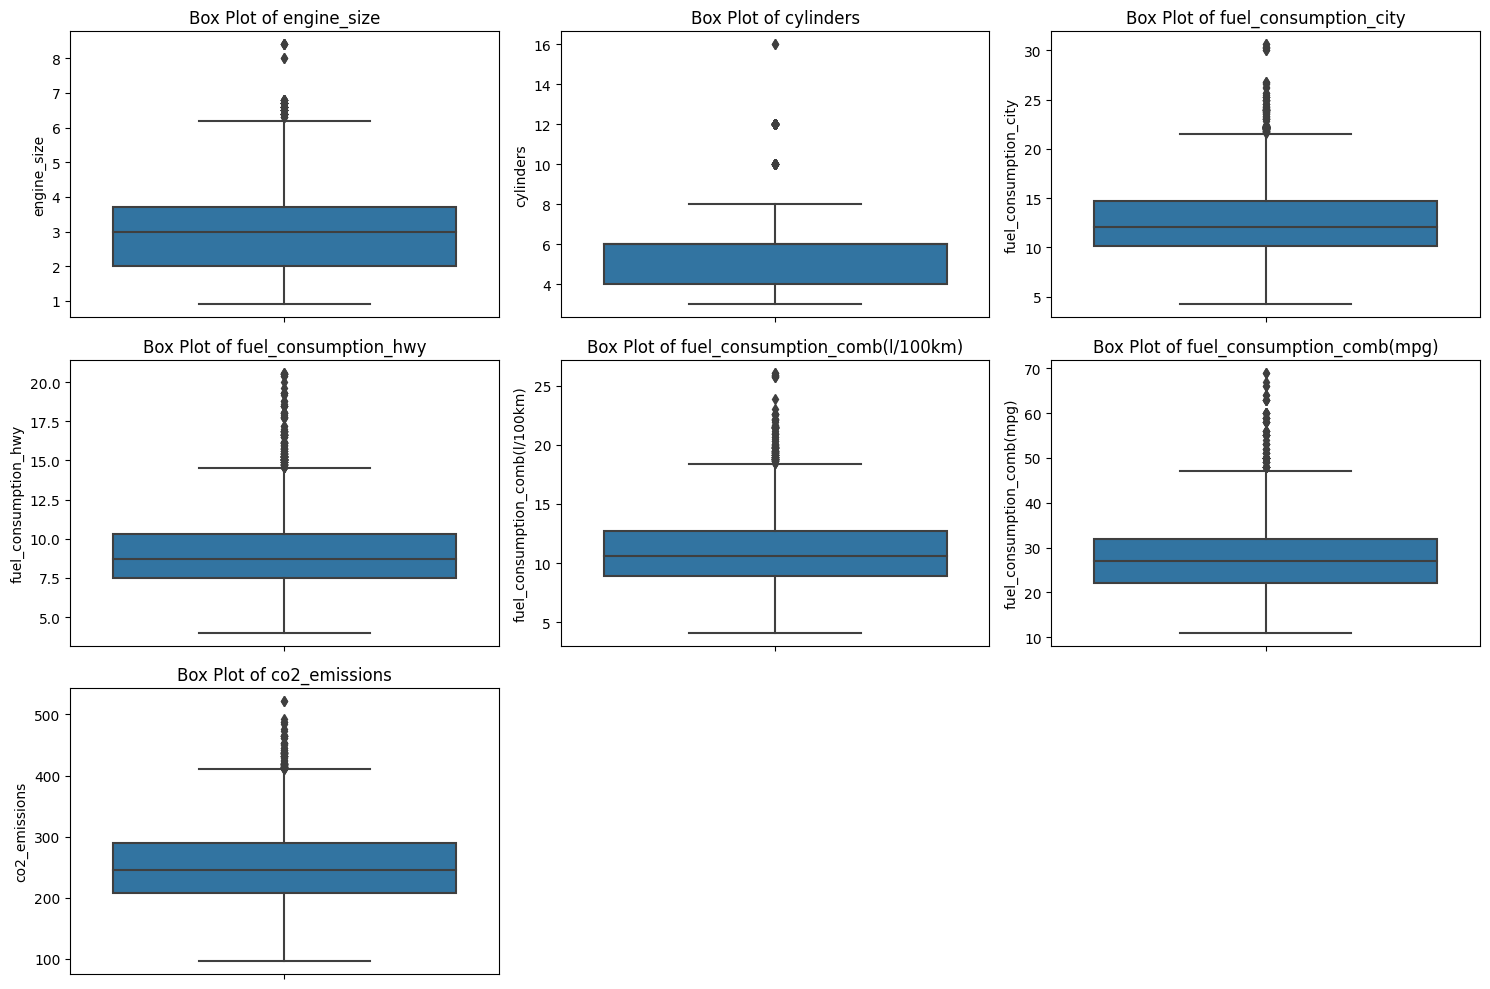

In [9]:

numerical_features = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_final[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


#### Correlation matrix (heatmap)

C:\Users\SHASHANK K\AppData\Local\Temp\ipykernel_15568\750403602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr()


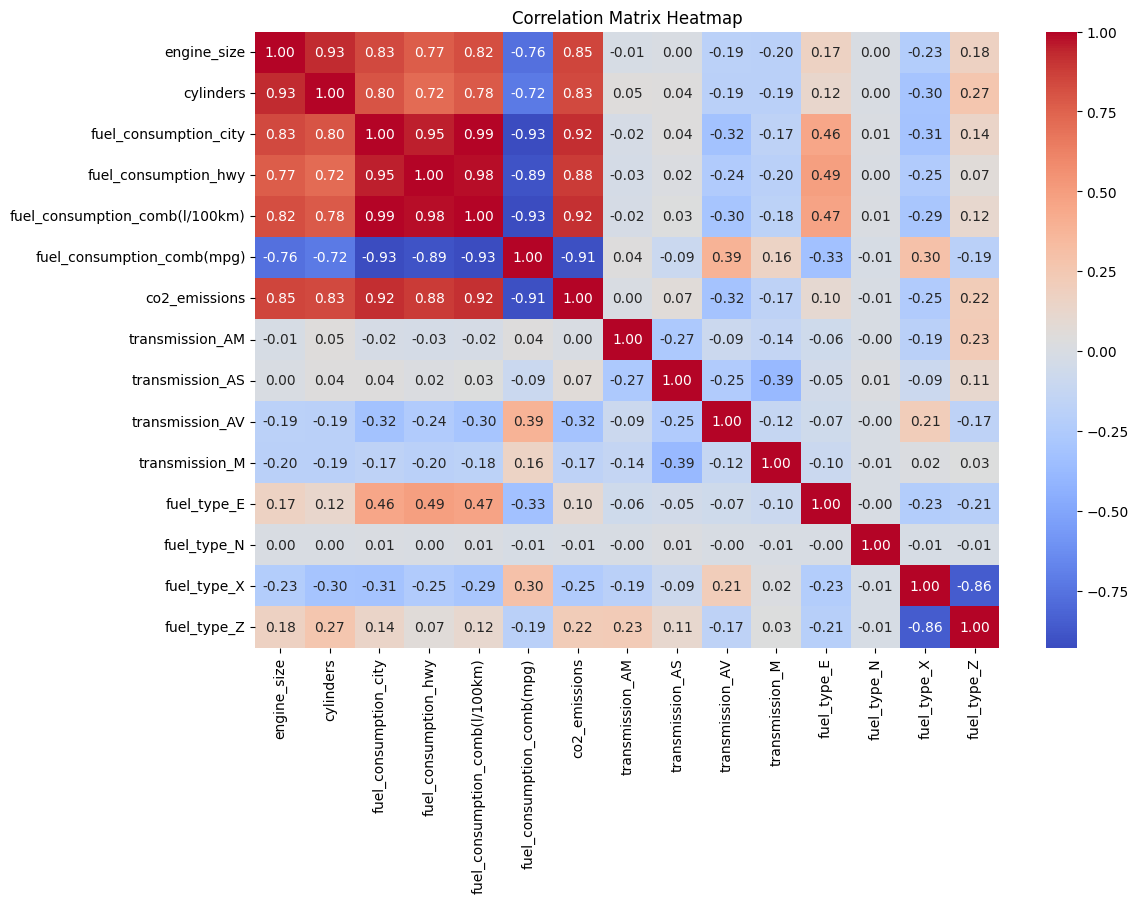

In [10]:

plt.figure(figsize=(12, 8))
corr_matrix = df_final.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### b) Identifying Key Factors Affecting CO₂ Emissions
#### Scatter plots

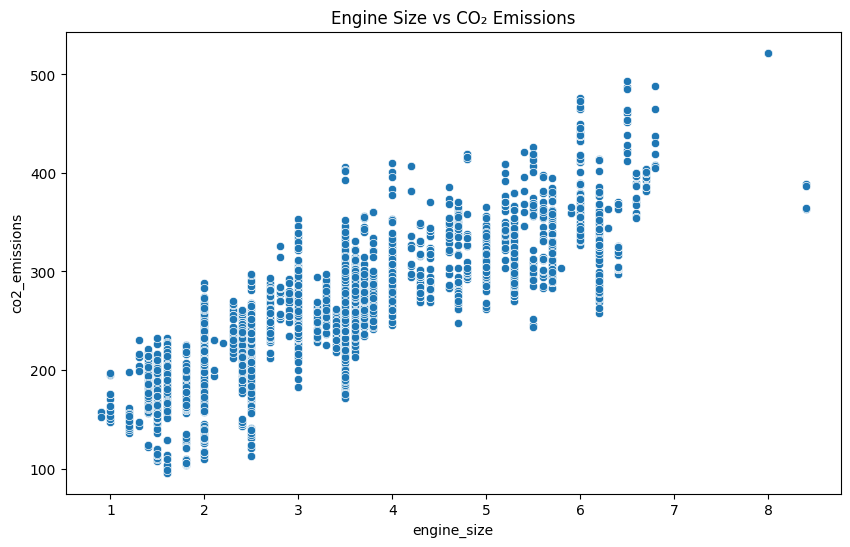

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='co2_emissions', data=df_final)
plt.title('Engine Size vs CO₂ Emissions')
plt.show()

#### Bar charts for categorical features

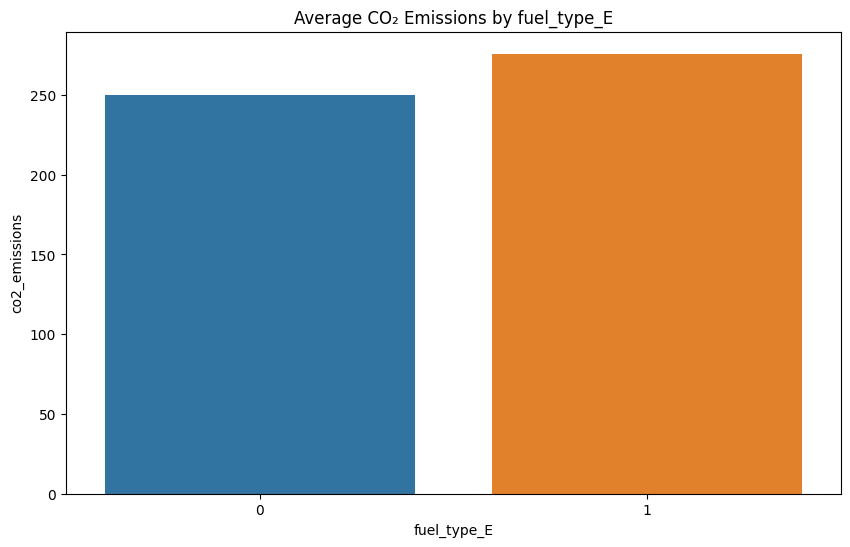

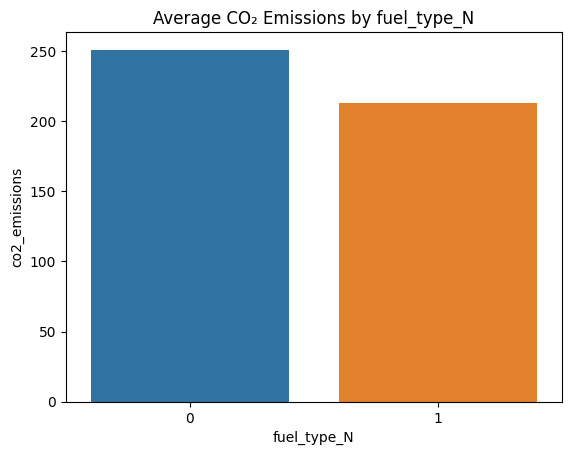

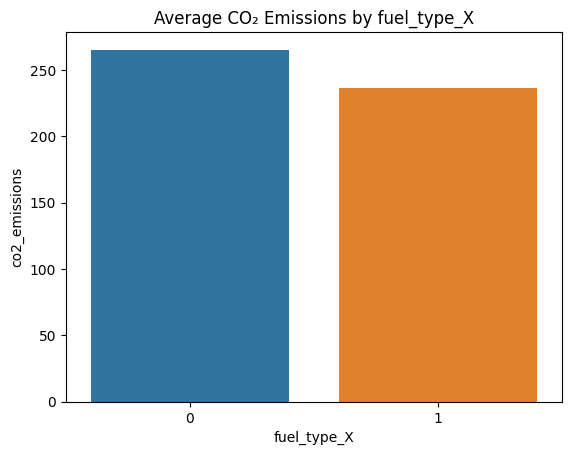

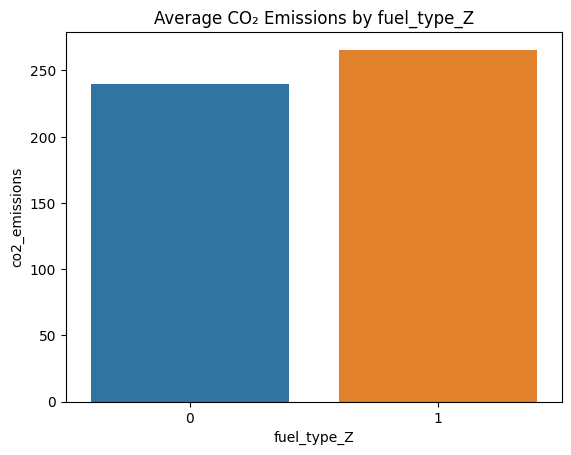

In [12]:

plt.figure(figsize=(10, 6))
categorical_features = ['fuel_type_E', 'fuel_type_N', 'fuel_type_X', 'fuel_type_Z']

for feature in categorical_features:
    avg_emissions = df_final.groupby(feature)['co2_emissions'].mean().reset_index()
    sns.barplot(x=feature, y='co2_emissions', data=avg_emissions)
    plt.title(f'Average CO₂ Emissions by {feature}')
    plt.show()

# Step 3: Feature Engineering

In [13]:
# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
numerical_features = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']

In [14]:
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

In [15]:
# Normalize numerical features using standard scaler
scaler = StandardScaler()
numeric_features = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']



In [16]:
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [17]:
# Create new feature: Fuel Efficiency Ratio
# (Combining fuel consumption in city and highway for a more balanced metric)
df_final['fuel_efficiency_ratio'] = df_final['fuel_consumption_city'] / (df_final['fuel_consumption_hwy'] + 1e-6)

In [18]:
# Display the updated dataset info and first few rows
print("\nNormalized and Feature-Engineered Dataset Info:\n")
df_final.info()
print("\nFirst 5 Rows with New Feature:\n", df_final.head())


Normalized and Feature-Engineered Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   vehicle_class                   6273 non-null   object 
 2   engine_size                     6273 non-null   float64
 3   cylinders                       6273 non-null   float64
 4   fuel_consumption_city           6273 non-null   float64
 5   fuel_consumption_hwy            6273 non-null   float64
 6   fuel_consumption_comb(l/100km)  6273 non-null   float64
 7   fuel_consumption_comb(mpg)      6273 non-null   float64
 8   co2_emissions                   6273 non-null   float64
 9   transmission_AM                 6273 non-null   uint8  
 10  transmission_AS                 6273 non-null   uint8  
 11  transmission_AV                 6273 non-null

# Step 4: Splitting the Data

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   vehicle_class                   6273 non-null   object 
 2   engine_size                     6273 non-null   float64
 3   cylinders                       6273 non-null   float64
 4   fuel_consumption_city           6273 non-null   float64
 5   fuel_consumption_hwy            6273 non-null   float64
 6   fuel_consumption_comb(l/100km)  6273 non-null   float64
 7   fuel_consumption_comb(mpg)      6273 non-null   float64
 8   co2_emissions                   6273 non-null   float64
 9   transmission_AM                 6273 non-null   uint8  
 10  transmission_AS                 6273 non-null   uint8  
 11  transmission_AV                 6273 non-null   uint8  
 12  transmission_M                  62

In [20]:
# Define features (X) and target (y)
X = df_final[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']]
y = df_final['co2_emissions']

In [21]:
# Split the dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Display the shapes of the training and testing sets
print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (5018, 6) (5018,)
Testing Set Shape: (1255, 6) (1255,)


# Step 5: Model Selection & Training

## Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [24]:
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}\n")

Linear Regression Performance:
MAE: 0.028863206216777713
MSE: 0.002126661175935205
R2 Score: 0.8923307129646944



In [28]:
import joblib
joblib.dump(lr, 'Linear_Regression.h5')

['Linear_Regression.h5']

## Decision Tree Regressor

In [29]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [30]:
print("Decision Tree Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt)}\n")

Decision Tree Regressor Performance:
MAE: 0.00775823526076037
MSE: 0.0005376163905812571
R2 Score: 0.9727813842057265



In [32]:
joblib.dump(dt, 'Decision_Tree.h5')

['Decision_Tree.h5']

## Random Forest Regressor

In [33]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [34]:
print("Random Forest Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}\n")

Random Forest Regressor Performance:
MAE: 0.007697681144862208
MSE: 0.0003748624206125105
R2 Score: 0.9810213446220792



In [35]:
joblib.dump(rf, 'Random_Forest.h5')

['Random_Forest.h5']

## Gradient Boosting Regressor

In [36]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [37]:
print("Gradient Boosting Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_gb)}\n")

Gradient Boosting Regressor Performance:
MAE: 0.01300152432621965
MSE: 0.0005919444386350141
R2 Score: 0.9700308462892219



In [39]:
joblib.dump(gb, 'Gradient_Boost.h5')

['Gradient_Boost.h5']

## XGBoost Regressor

In [40]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [41]:
print("XGBoost Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}\n")

XGBoost Regressor Performance:
MAE: 0.007860448323044581
MSE: 0.0003360450538005069
R2 Score: 0.9829866027725218



In [42]:
joblib.dump(xgb, 'XGBoost_Regressor.h5')

['XGBoost_Regressor.h5']

# step 6: model evaluation

In [43]:
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

In [45]:
print("Step 6: Model Evaluation")
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Descent", y_test, y_pred_gb)
evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)

Step 6: Model Evaluation
Linear Regression Performance:
MAE: 0.028863206216777713
MSE: 0.002126661175935205
R2 Score: 0.8923307129646944

Decision Tree Regressor Performance:
MAE: 0.00775823526076037
MSE: 0.0005376163905812571
R2 Score: 0.9727813842057265

Random Forest Regressor Performance:
MAE: 0.007697681144862208
MSE: 0.0003748624206125105
R2 Score: 0.9810213446220792

Gradient Descent Performance:
MAE: 0.01300152432621965
MSE: 0.0005919444386350141
R2 Score: 0.9700308462892219

XGBoost Regressor Performance:
MAE: 0.007860448323044581
MSE: 0.0003360450538005069
R2 Score: 0.9829866027725218



#### Compare the models and select the best one

In [46]:
model_scores = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Decision Tree Regressor": r2_score(y_test, y_pred_dt),
    "Random Forest Regressor": r2_score(y_test, y_pred_rf)
}
best_model = max(model_scores, key=model_scores.get)
print(f"Best performing model: {best_model} with R2 Score: {model_scores[best_model]}")

Best performing model: Random Forest Regressor with R2 Score: 0.9810213446220792


# Manual prediction

In [49]:
from keras.models import load_model

In [69]:
model = joblib.load('Random_Forest.h5')

In [86]:
import numpy as np
random_values = np.array([12, 4, 20, 7.7, 9.6, 1.1])  # Adjust based on feature count
random_values = random_values.reshape(1, -1)
prediction = model.predict(random_values)
print(f"{prediction[0]*100}% of CO2 is emitted from respective mentioned engine")

91.9182316118936% of CO2 is emitted from respective mentioned engine


c:\users\shashank k\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
